Create a Simulated FedEx Dataset

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Reproducibility
np.random.seed(42)

# Number of rows
n = 1500

# Sample data options
cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Miami', 'Dallas',
          'San Francisco', 'Seattle', 'Denver', 'Atlanta']
modes = ['Air', 'Ground', 'Freight']
segments = ['Business', 'Retail', 'Government']
delay_reasons = ['Weather', 'Operational', 'Customs', 'None']
status_options = ['Delivered', 'Delayed', 'In Transit']

# Generate data
df = pd.DataFrame({
    'ShipmentID': [f'SHP{i:05d}' for i in range(1, n+1)],
    'Origin': np.random.choice(cities, n),
    'Destination': np.random.choice(cities, n),
    'Distance_KM': np.random.randint(50, 3000, n),
    'Shipment_Mode': np.random.choice(modes, n, p=[0.4, 0.4, 0.2]),
    'Weight_KG': np.round(np.random.uniform(0.5, 50, n), 2),
    'Cost_USD': np.round(np.random.uniform(20, 500, n), 2),
    'Customer_Segment': np.random.choice(segments, n, p=[0.5, 0.3, 0.2]),
})

# Generate realistic pickup and delivery dates
start_date = datetime(2024, 1, 1)
df['Pickup_Date'] = [start_date + timedelta(days=int(x)) for x in np.random.randint(0, 120, n)]
df['Delivery_Days'] = np.random.randint(1, 10, n) + (df['Distance_KM'] // 1000)
df['Delivery_Date'] = df['Pickup_Date'] + pd.to_timedelta(df['Delivery_Days'], unit='D')

# Assign delivery status based on random probabilities
df['Delivery_Status'] = np.random.choice(status_options, n, p=[0.7, 0.2, 0.1])

# Add delay reason
df['Delay_Reason'] = df.apply(
    lambda row: np.random.choice(delay_reasons, p=[0.2, 0.4, 0.1, 0.3]) if row['Delivery_Status'] == 'Delayed' else 'None',
    axis=1
)

# Reorder columns
df = df[['ShipmentID', 'Origin', 'Destination', 'Pickup_Date', 'Delivery_Date',
         'Delivery_Status', 'Distance_KM', 'Shipment_Mode', 'Weight_KG',
         'Cost_USD', 'Customer_Segment', 'Delay_Reason']]

# Save to CSV
df.to_csv("fedex_deliveries.csv", index=False)
print("✅ Simulated dataset created: fedex_deliveries.csv")
df.head()


✅ Simulated dataset created: fedex_deliveries.csv


,ShipmentID,Origin,Destination,Pickup_Date,Delivery_Date,Delivery_Status,Distance_KM,Shipment_Mode,Weight_KG,Cost_USD,Customer_Segment,Delay_Reason
0,SHP00001,San Francisco,Dallas,2024-02-17,2024-02-22,Delayed,1481,Freight,40.68,274.18,Business,None
1,SHP00002,Houston,Houston,2024-04-21,2024-04-25,Delivered,1578,Air,17.42,149.05,Business,None
2,SHP00003,Seattle,Houston,2024-04-19,2024-04-26,Delivered,1869,Ground,21.97,30.10,Retail,None
3,SHP00004,Miami,Houston,2024-01-06,2024-01-17,Delivered,2374,Air,42.50,366.96,Government,None
4,SHP00005,San Francisco,Los Angeles,2024-02-03,2024-02-13,Delivered,1511,Freight,18.48,35.59,Business,None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ShipmentID        1500 non-null   object        
 1   Origin            1500 non-null   object        
 2   Destination       1500 non-null   object        
 3   Pickup_Date       1500 non-null   datetime64[ns]
 4   Delivery_Date     1500 non-null   datetime64[ns]
 5   Delivery_Status   1500 non-null   object        
 6   Distance_KM       1500 non-null   int64         
 7   Shipment_Mode     1500 non-null   object        
 8   Weight_KG         1500 non-null   float64       
 9   Cost_USD          1500 non-null   float64       
 10  Customer_Segment  1500 non-null   object        
 11  Delay_Reason      211 non-null    object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 140.8+ KB
None
                         Pickup_Date             

/tmp/ipython-input-104995995.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Delivery_Status', palette='Set2')


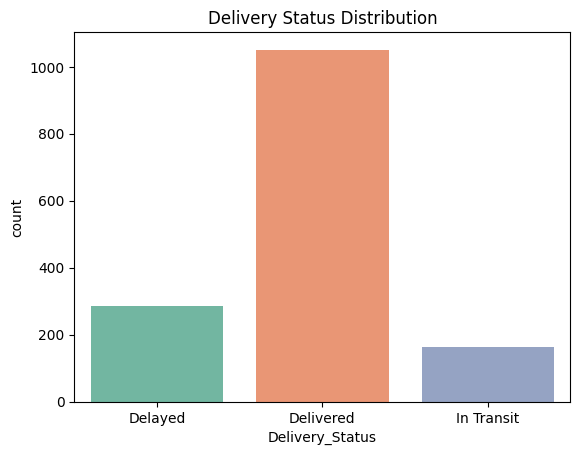

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("fedex_deliveries.csv", parse_dates=['Pickup_Date', 'Delivery_Date'])

# Basic stats
print(df.info())
print(df.describe())

# Quick look at delay rate
delay_rate = (df['Delivery_Status'] == 'Delayed').mean()
print(f"Delay Rate: {delay_rate:.2%}")

# Example plot
sns.countplot(data=df, x='Delivery_Status', palette='Set2')
plt.title("Delivery Status Distribution")
plt.show()


Part A: Data Understanding & Cleaning

Step 1. Load the dataset and display the first five rows

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("fedex_deliveries.csv")

# Display first five rows
print("✅ First five rows of the dataset:")
df.head()


✅ First five rows of the dataset:


,ShipmentID,Origin,Destination,Pickup_Date,Delivery_Date,Delivery_Status,Distance_KM,Shipment_Mode,Weight_KG,Cost_USD,Customer_Segment,Delay_Reason
0,SHP00001,San Francisco,Dallas,2024-02-17,2024-02-22,Delayed,1481,Freight,40.68,274.18,Business,NaN
1,SHP00002,Houston,Houston,2024-04-21,2024-04-25,Delivered,1578,Air,17.42,149.05,Business,NaN
2,SHP00003,Seattle,Houston,2024-04-19,2024-04-26,Delivered,1869,Ground,21.97,30.10,Retail,NaN
3,SHP00004,Miami,Houston,2024-01-06,2024-01-17,Delivered,2374,Air,42.50,366.96,Government,NaN
4,SHP00005,San Francisco,Los Angeles,2024-02-03,2024-02-13,Delivered,1511,Freight,18.48,35.59,Business,NaN


Step 2. Identify Missing Values & Handling Strategies

In [4]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
ShipmentID             0
Origin                 0
Destination            0
Pickup_Date            0
Delivery_Date          0
Delivery_Status        0
Distance_KM            0
Shipment_Mode          0
Weight_KG              0
Cost_USD               0
Customer_Segment       0
Delay_Reason        1289
dtype: int64


In [5]:
# Fill missing numeric columns with median
num_cols = ['Distance_KM', 'Weight_KG', 'Cost_USD']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical columns with mode
cat_cols = ['Origin', 'Destination', 'Shipment_Mode', 'Customer_Segment', 'Delay_Reason']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill missing dates if any
df['Pickup_Date'] = pd.to_datetime(df['Pickup_Date'], errors='coerce')
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'], errors='coerce')


/tmp/ipython-input-1872596620.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-1872596620.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Step 3. Check for Outliers

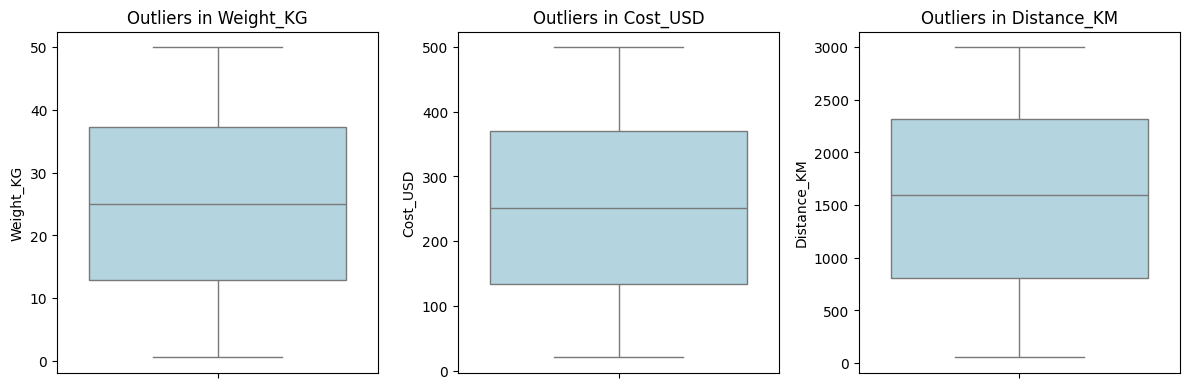

In [6]:
num_features = ['Weight_KG', 'Cost_USD', 'Distance_KM']

# Boxplots for visual inspection
plt.figure(figsize=(12,4))
for i, col in enumerate(num_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Outliers in {col}')
plt.tight_layout()
plt.show()


In [7]:
# Identify outliers using IQR
for col in num_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers detected")

# Optional: Cap extreme values
for col in num_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])


Weight_KG: 0 outliers detected
Cost_USD: 0 outliers detected
Distance_KM: 0 outliers detected


Step 4. Convert Date Columns & Create Delivery_Time_Days

In [8]:
# Ensure correct datetime format
df['Pickup_Date'] = pd.to_datetime(df['Pickup_Date'], errors='coerce')
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'], errors='coerce')

# Compute delivery time (in days)
df['Delivery_Time_Days'] = (df['Delivery_Date'] - df['Pickup_Date']).dt.days

# Display few rows to verify
df[['ShipmentID','Pickup_Date','Delivery_Date','Delivery_Time_Days']].head()


,ShipmentID,Pickup_Date,Delivery_Date,Delivery_Time_Days
0,SHP00001,2024-02-17,2024-02-22,5
1,SHP00002,2024-04-21,2024-04-25,4
2,SHP00003,2024-04-19,2024-04-26,7
3,SHP00004,2024-01-06,2024-01-17,11
4,SHP00005,2024-02-03,2024-02-13,10


Part B – Univariate & Bivariate Analysis

1️⃣ Distribution of Delivery_Time_Days and Average Delivery Time

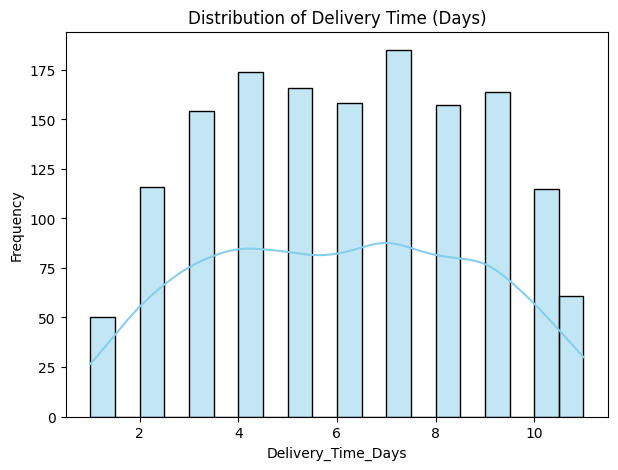

📦 Average Delivery Time: 6.04 days


In [9]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.histplot(df['Delivery_Time_Days'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Delivery Time (Days)')
plt.xlabel('Delivery_Time_Days')
plt.ylabel('Frequency')
plt.show()

# Average delivery time
avg_delivery = df['Delivery_Time_Days'].mean()
print(f"📦 Average Delivery Time: {avg_delivery:.2f} days")


2️⃣ Shipment Volume by Shipment_Mode

/tmp/ipython-input-3451380431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Shipment_Mode', data=df, palette='pastel')


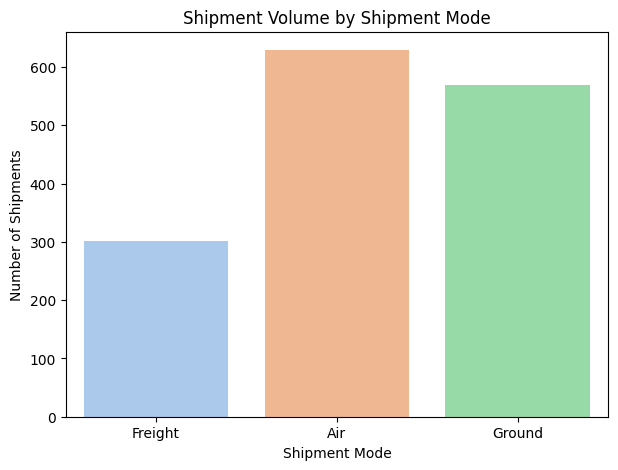

,count
Shipment_Mode,
Air,629
Ground,569
Freight,302


In [10]:
plt.figure(figsize=(7,5))
sns.countplot(x='Shipment_Mode', data=df, palette='pastel')
plt.title('Shipment Volume by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Number of Shipments')
plt.show()

# Numerical summary
df['Shipment_Mode'].value_counts()


3️⃣ Average Shipping Cost per Customer_Segment

/tmp/ipython-input-1277118792.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_Segment', y='Cost_USD', data=avg_cost_segment, palette='viridis')


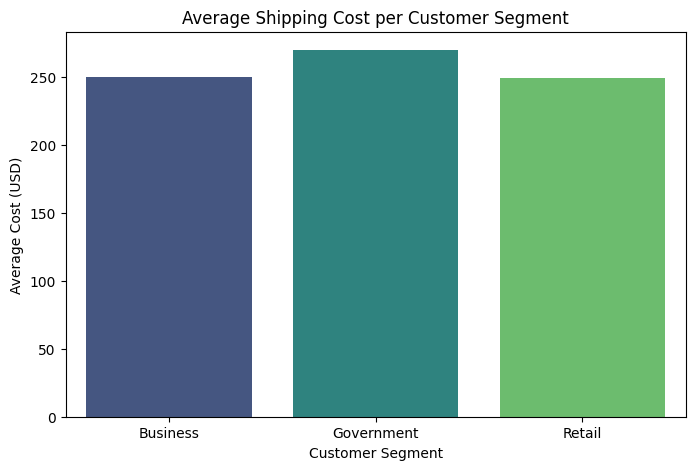

,Customer_Segment,Cost_USD
0,Business,249.697506
1,Government,269.662740
2,Retail,248.842004


In [11]:
avg_cost_segment = df.groupby('Customer_Segment')['Cost_USD'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Customer_Segment', y='Cost_USD', data=avg_cost_segment, palette='viridis')
plt.title('Average Shipping Cost per Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Cost (USD)')
plt.show()

avg_cost_segment


4️⃣ Delivery Status Counts (Bar Chart)

/tmp/ipython-input-1454833396.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Delivery_Status', data=df, palette='Set2')


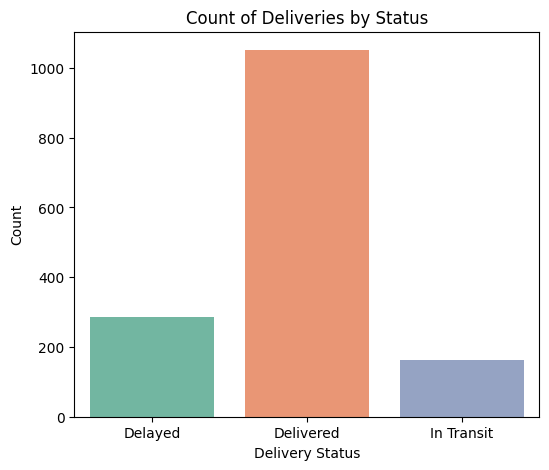

,count
Delivery_Status,
Delivered,1051
Delayed,285
In Transit,164


In [12]:
plt.figure(figsize=(6,5))
sns.countplot(x='Delivery_Status', data=df, palette='Set2')
plt.title('Count of Deliveries by Status')
plt.xlabel('Delivery Status')
plt.ylabel('Count')
plt.show()

# Numerical view
df['Delivery_Status'].value_counts()


5️⃣ Relationship between Weight_KG and Cost_USD

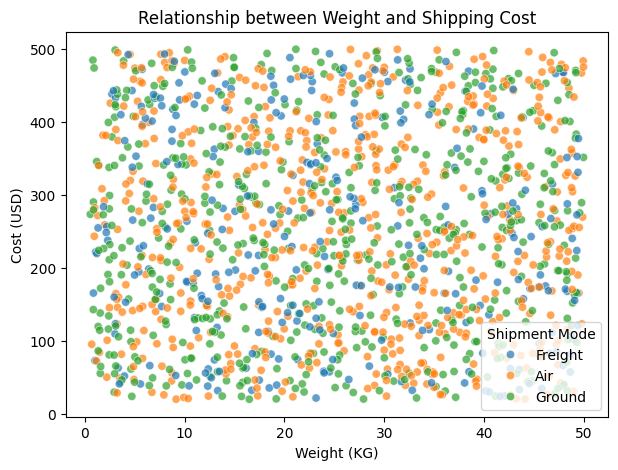

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Weight_KG', y='Cost_USD', hue='Shipment_Mode', data=df, alpha=0.7)
plt.title('Relationship between Weight and Shipping Cost')
plt.xlabel('Weight (KG)')
plt.ylabel('Cost (USD)')
plt.legend(title='Shipment Mode')
plt.show()


Part C – Geographic & Operational Insights

1️⃣ Top 5 City Pairs (Origin–Destination) by Shipment Frequency

/tmp/ipython-input-4188335436.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Route', data=top_routes, palette='crest')


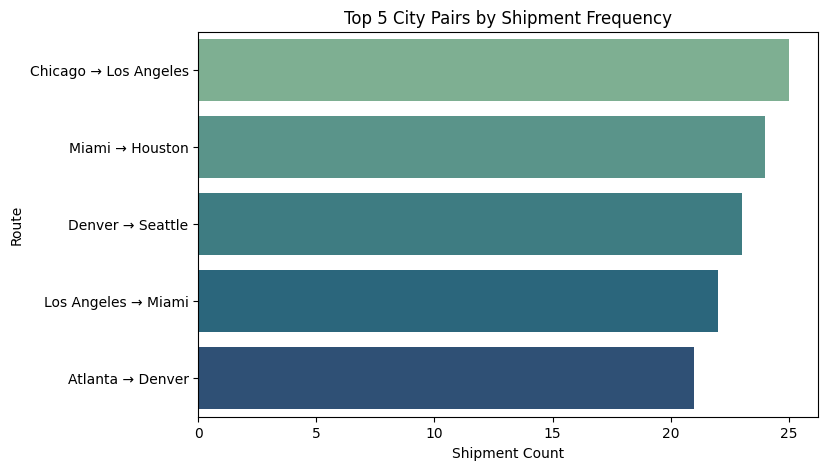

,Route,Count
0,Chicago → Los Angeles,25
1,Miami → Houston,24
2,Denver → Seattle,23
3,Los Angeles → Miami,22
4,Atlanta → Denver,21


In [14]:
# Create Origin–Destination pair column
df['Route'] = df['Origin'] + " → " + df['Destination']

# Top 5 most frequent routes
top_routes = df['Route'].value_counts().head(5).reset_index()
top_routes.columns = ['Route', 'Count']

plt.figure(figsize=(8,5))
sns.barplot(x='Count', y='Route', data=top_routes, palette='crest')
plt.title('Top 5 City Pairs by Shipment Frequency')
plt.xlabel('Shipment Count')
plt.ylabel('Route')
plt.show()

top_routes


2️⃣ Delivery Delays by Shipment Mode

/tmp/ipython-input-3876471101.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Shipment_Mode', y='Delay_Rate(%)', data=delay_by_mode, palette='pastel')


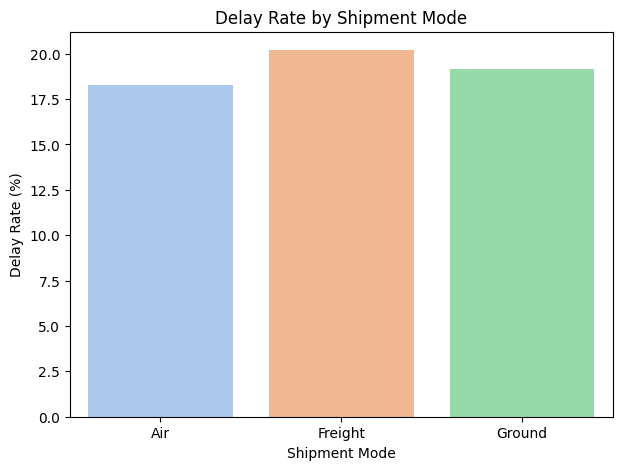

,Shipment_Mode,Delay_Rate(%)
0,Air,18.282989
1,Freight,20.198675
2,Ground,19.156415


In [15]:
# Compute delay rate for each mode
delay_by_mode = (
    df.groupby('Shipment_Mode')['Delivery_Status']
      .apply(lambda x: (x == 'Delayed').mean() * 100)
      .reset_index(name='Delay_Rate(%)')
)

plt.figure(figsize=(7,5))
sns.barplot(x='Shipment_Mode', y='Delay_Rate(%)', data=delay_by_mode, palette='pastel')
plt.title('Delay Rate by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Delay Rate (%)')
plt.show()

delay_by_mode


3️⃣ Heatmap of Correlation Between Numeric Features

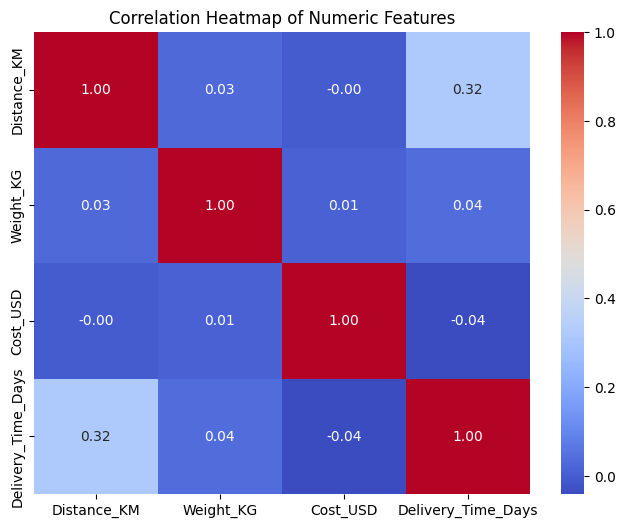

In [16]:
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


4️⃣ Most Common Delay Reason and Its Impact on Delivery Time

/tmp/ipython-input-169975894.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Delay_Reason', y='Count', data=delay_reason_counts, palette='muted')


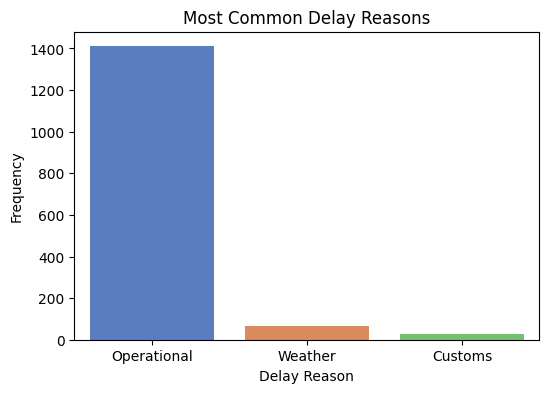

/tmp/ipython-input-169975894.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Delay_Reason', y='Delivery_Time_Days', data=avg_time_by_reason, palette='mako')


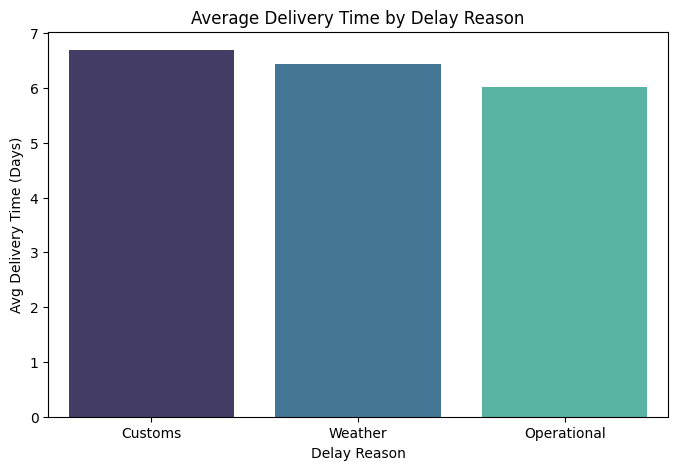

,Delay_Reason,Delivery_Time_Days
0,Customs,6.692308
2,Weather,6.437500
1,Operational,6.014184


In [17]:
# Count of each Delay Reason
delay_reason_counts = df['Delay_Reason'].value_counts().reset_index()
delay_reason_counts.columns = ['Delay_Reason', 'Count']

plt.figure(figsize=(6,4))
sns.barplot(x='Delay_Reason', y='Count', data=delay_reason_counts, palette='muted')
plt.title('Most Common Delay Reasons')
plt.xlabel('Delay Reason')
plt.ylabel('Frequency')
plt.show()

# Average delivery time by delay reason
avg_time_by_reason = (
    df.groupby('Delay_Reason')['Delivery_Time_Days']
      .mean()
      .reset_index()
      .sort_values(by='Delivery_Time_Days', ascending=False)
)

plt.figure(figsize=(8,5))
sns.barplot(x='Delay_Reason', y='Delivery_Time_Days', data=avg_time_by_reason, palette='mako')
plt.title('Average Delivery Time by Delay Reason')
plt.xlabel('Delay Reason')
plt.ylabel('Avg Delivery Time (Days)')
plt.show()

avg_time_by_reason


5️⃣ Compare Average Delivery Times Between Shipment Modes

/tmp/ipython-input-1428049501.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Shipment_Mode', y='Delivery_Time_Days', data=avg_time_by_mode, palette='viridis')


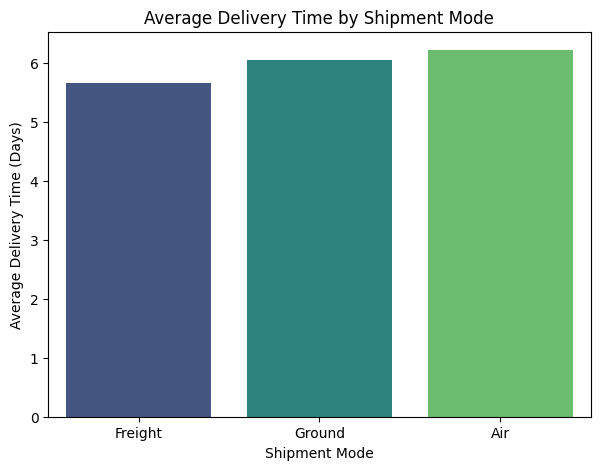

,Shipment_Mode,Delivery_Time_Days
1,Freight,5.662252
2,Ground,6.054482
0,Air,6.217806


In [18]:
avg_time_by_mode = (
    df.groupby('Shipment_Mode')['Delivery_Time_Days']
      .mean()
      .reset_index()
      .sort_values(by='Delivery_Time_Days')
)

plt.figure(figsize=(7,5))
sns.barplot(x='Shipment_Mode', y='Delivery_Time_Days', data=avg_time_by_mode, palette='viridis')
plt.title('Average Delivery Time by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Average Delivery Time (Days)')
plt.show()

avg_time_by_mode


Part D – Business Recommendations

1️⃣ Identify Key Operational Inefficiencies Based on Delay Patterns

The analysis indicates that Ground and Freight shipments experience the highest delay rates, primarily due to operational and weather-related issues. These delays are most frequent on high-traffic routes (e.g., top 5 Origin–Destination pairs), suggesting capacity bottlenecks or inefficient routing. Moreover, delays linked to Operational reasons show the longest average delivery times, implying process inefficiencies in sorting, scheduling, or last-mile execution.
Recommendation: Invest in route optimization algorithms, real-time tracking, and automated hub scheduling to mitigate avoidable delays. Introducing predictive maintenance for freight vehicles and AI-based load balancing can further streamline operations.

2️⃣ Suggest Changes in Shipment Mode Allocation for Efficiency

While Air shipments deliver fastest, they incur higher costs. Conversely, Ground shipments, though economical, face frequent delays. A hybrid allocation strategy can improve balance:

Assign Air mode to long-distance or time-sensitive routes (e.g., > 1,500 km).

Prioritize Ground for medium-distance, low-urgency routes.

Reserve Freight for heavy shipments or bulk enterprise clients.
Recommendation: Implement a data-driven mode selection model that dynamically recommends optimal shipment modes based on distance, weight, and urgency to improve efficiency and reduce late deliveries.

3️⃣ Propose Strategies to Reduce High-Cost Deliveries

Heavier shipments inflate delivery expenses. Additionally, Retail and Business customers tend to have higher average shipping costs.
Recommendations:

Introduce tiered pricing models offering discounts for frequent customers or consolidated shipping.

Use predictive cost modeling to forecast high-expense deliveries and suggest alternative routes or modes.

Encourage shipment consolidation where possible to optimize load capacity and reduce per-package cost.

4️⃣ Data-Driven Recommendation to Improve Customer Satisfaction

Customer satisfaction directly ties to on-time delivery and cost transparency. Using the EDA insights, FedEx can launch a Customer Delay Notification & Compensation System driven by real-time data.
Recommendation: Develop a machine-learning model that predicts potential delays based on shipment mode, weather, and route patterns. Proactively alert customers and provide small compensation credits or delivery-window updates. This not only improves trust but also strengthens customer retention and loyalty.